<a href="https://colab.research.google.com/github/bindusri-c/Data_mining/blob/main/KNN_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imported all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, precision_recall_curve, average_precision_score
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
#Mounting drive so that I can import files from it

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#reading from dataset into dataframe using pandas

In [ ]:
#df=pd.read_csv('/content/drive/MyDrive/KNN_NB/dataset_NB.csv')
df=pd.read_csv('dataset_NB_-2095740841.csv')
df.shape


(3000, 2)

In [ ]:
#to see the the data and know about columns and target variables, data types
df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [ ]:
#to know about the data types of each of teh columns
df.dtypes

email    object
label     int64
dtype: object

In [ ]:
# to find the size of the data, mean of the data, std deviation, mostly statistical measures
df.describe()

,label
count,3000.000000
mean,0.166667
std,0.372740
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
# checking for nan or null values
df.isna().sum()

email    1
label    0
dtype: int64

In [ ]:
#dropped the nan values
df=df.dropna()

In [ ]:
#checked if there were anymore nan left
df.isna().sum()

email    0
label    0
dtype: int64

In [ ]:
#checked for duoplicated values
df.loc[df.duplicated()]

,email,label
317,i think that this and other articles confuse s...,0
318,i think that this and other articles confuse s...,0
460,i agree with rob i think if the phones and mms...,0
787,a friend in dublin is mailing me the cd which ...,0
1805,use perl daily headline mailer this week on pe...,0
...,...,...
2946,we guarantee you signups before you ever pay a...,1
2954,otc newsletter discover tomorrow s winners fo...,1
2963,protect your financial well being purchase an ...,1
2968,lowest rates available for term life insurance...,1


In [ ]:
#dropped the duplicates
df= df.drop_duplicates()

In [ ]:
#saw the shape of the data to see if duplicates were dropped
df.shape

(2872, 2)

In [ ]:
#used the train test splitter to split into traina nd test sets
x_train,x_test,y_train,y_test=train_test_split(df.email,df.label,test_size=0.20, random_state=42)

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')

# Fit-transforming the training data and test data
x_train_count = count_vectorizer.fit_transform(x_train)
x_test_count = count_vectorizer.transform(x_test)

#Using gaussian naive bayes classifier for training
nb_classifier = GaussianNB()

# Training the classifier
nb_classifier.fit(x_train_count.toarray(), y_train)

#getting predictions on test data using the classifier
y_pred = nb_classifier.predict(x_test_count.toarray())

#checking accuracy using predicted data and actual data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using CountVectorizer:", accuracy)

Accuracy using CountVectorizer: 0.9321739130434783


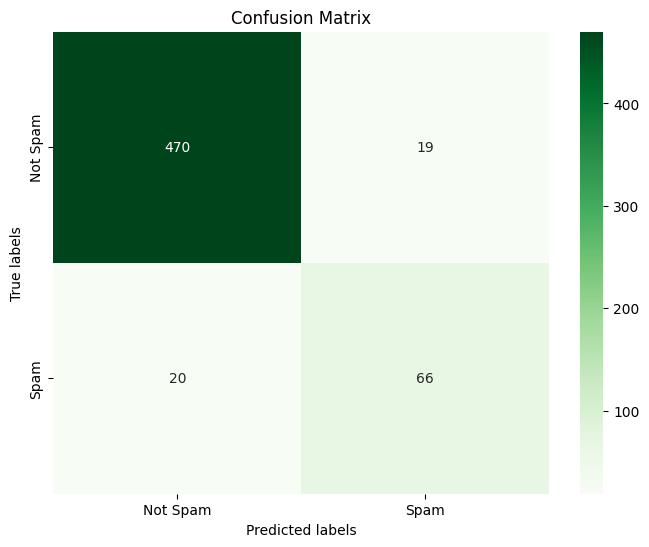

In [ ]:
#Plotting the confusion matrix to find out true positives, true negatives, false positves and false negatives
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

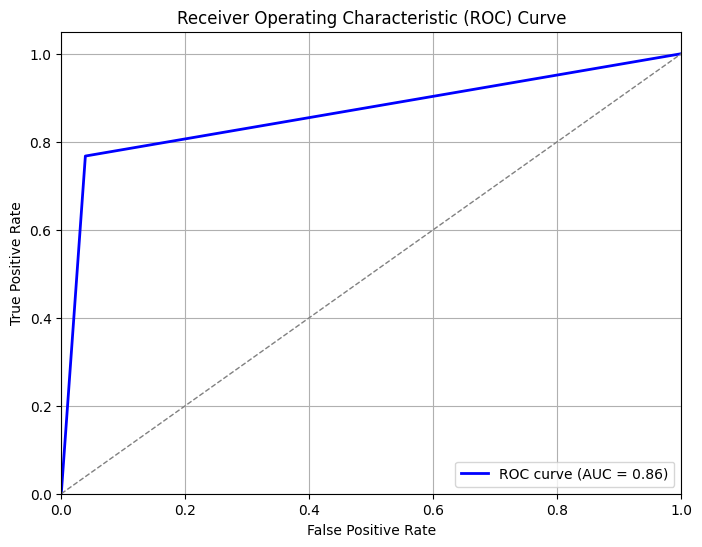

In [ ]:
#getting the false positive and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

***REPORT***

1.   Imported dataset from drive.
2.   Read it into a dataframe using pandas library.

**Understanding the dataset**
1. Used shape and head functions to understand the shape of dataset and see the different columns present in the dataset.
2. Checked the types of data for each column.
3. Used the describe function to understand the characteristics of the dataset such mean, count,min, max etc.
4. Checked for null values using isna function.
5. there are two columns in the data, one of them is email which contains the email contents, the other is label which will classify the email as spam or not. 1 is spam and 0 is not spam. Email is of type object and label is an integer object.

**Preprocessing The Dataset**
1. Dropped the row with null value as there was only one such value.
2. Checked for duplicated values using df.duplicated function. There were 127 values.
3. Dropped the duplicated values and replaced the dataframe and only kept one copy of such values to avoid overfitting as there is redundant data.
**Training and Testing the data**
1. Used the sklearn train test split function to split the dataset into train and test dataset using the 80-20 ratio for training and testing respectively.
2. Used count vectorizer for feature extraction. Following this, fit_transform function was used to fit the vectorizer to both training and test data and then transform the raw text to document term matrix. Each row in the matrix refers to the document and each column represents the terms in the learned vocabulary. We used count vectorizer for feature extraction because of its ability to convert text data into numerical format while preserving the frequency of words and handling sparse data efficiently.
3. Trained the Gaussian Naive Bayes classifier on the training data and then tested it on x_test.
4. Calculated the accuracy score using the accuracy score fucntion.
5. Plotted the confusion matrix. Our observations are as follows: 470 were
true positives and and 66 were true negatives. 20 are false positives and 19 were false negatives. We assume spam to be false and not spam to be true.
**ROC Curve**
1. We plotted the ROC curve and found the area under it to be 0.82 which is pretty good as area under curve implies the true positive rate is relatively high compared to false positive rate.

The accuracy score for the classifier is 0.9321.


Team members are:
 1. Sivani Tumuluri         - 1002118984
 2. Srivalli Bindu Nagineni - 1002175940
Contributions:

Both of us discussed every step in detail and worked on every part of the assignment. Report was written by both of us. We both searched for different feature extraction techniques online and came to the conclusion that we should use count vectorizer.





#KNN

In [ ]:
#imported the necessary libraries and only used those mentioned in the assignment
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, precision_recall_curve
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#mounted the drive to import dataset
from google.colab import drive
drive.mount('/content/drive/')


MessageError: Error: credential propagation was unsuccessful

In [ ]:
#used dataframe by pandas to fit the dataset
#df=pd.read_csv('/content/drive/MyDrive/KNN_NB/dataset_KNN.csv')
df=pd.read_csv('dataset_KNN.csv')

In [ ]:
#used shape function to know the number of columns and rows
df.shape

(768, 9)

In [ ]:
#used the head function to see all the columns and target variable and types of data in each column
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
#used describe function to get the statistical measures such mean, standard deviation of each column
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#wanted to know the datatypes the dataframe assigned to each column
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
#checked for the number of non null values in every column using info function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
#used the na function and sum function to check for nan values which would be summed up for each column
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**Heat Map Before Data Preprocessing**

<Axes: >

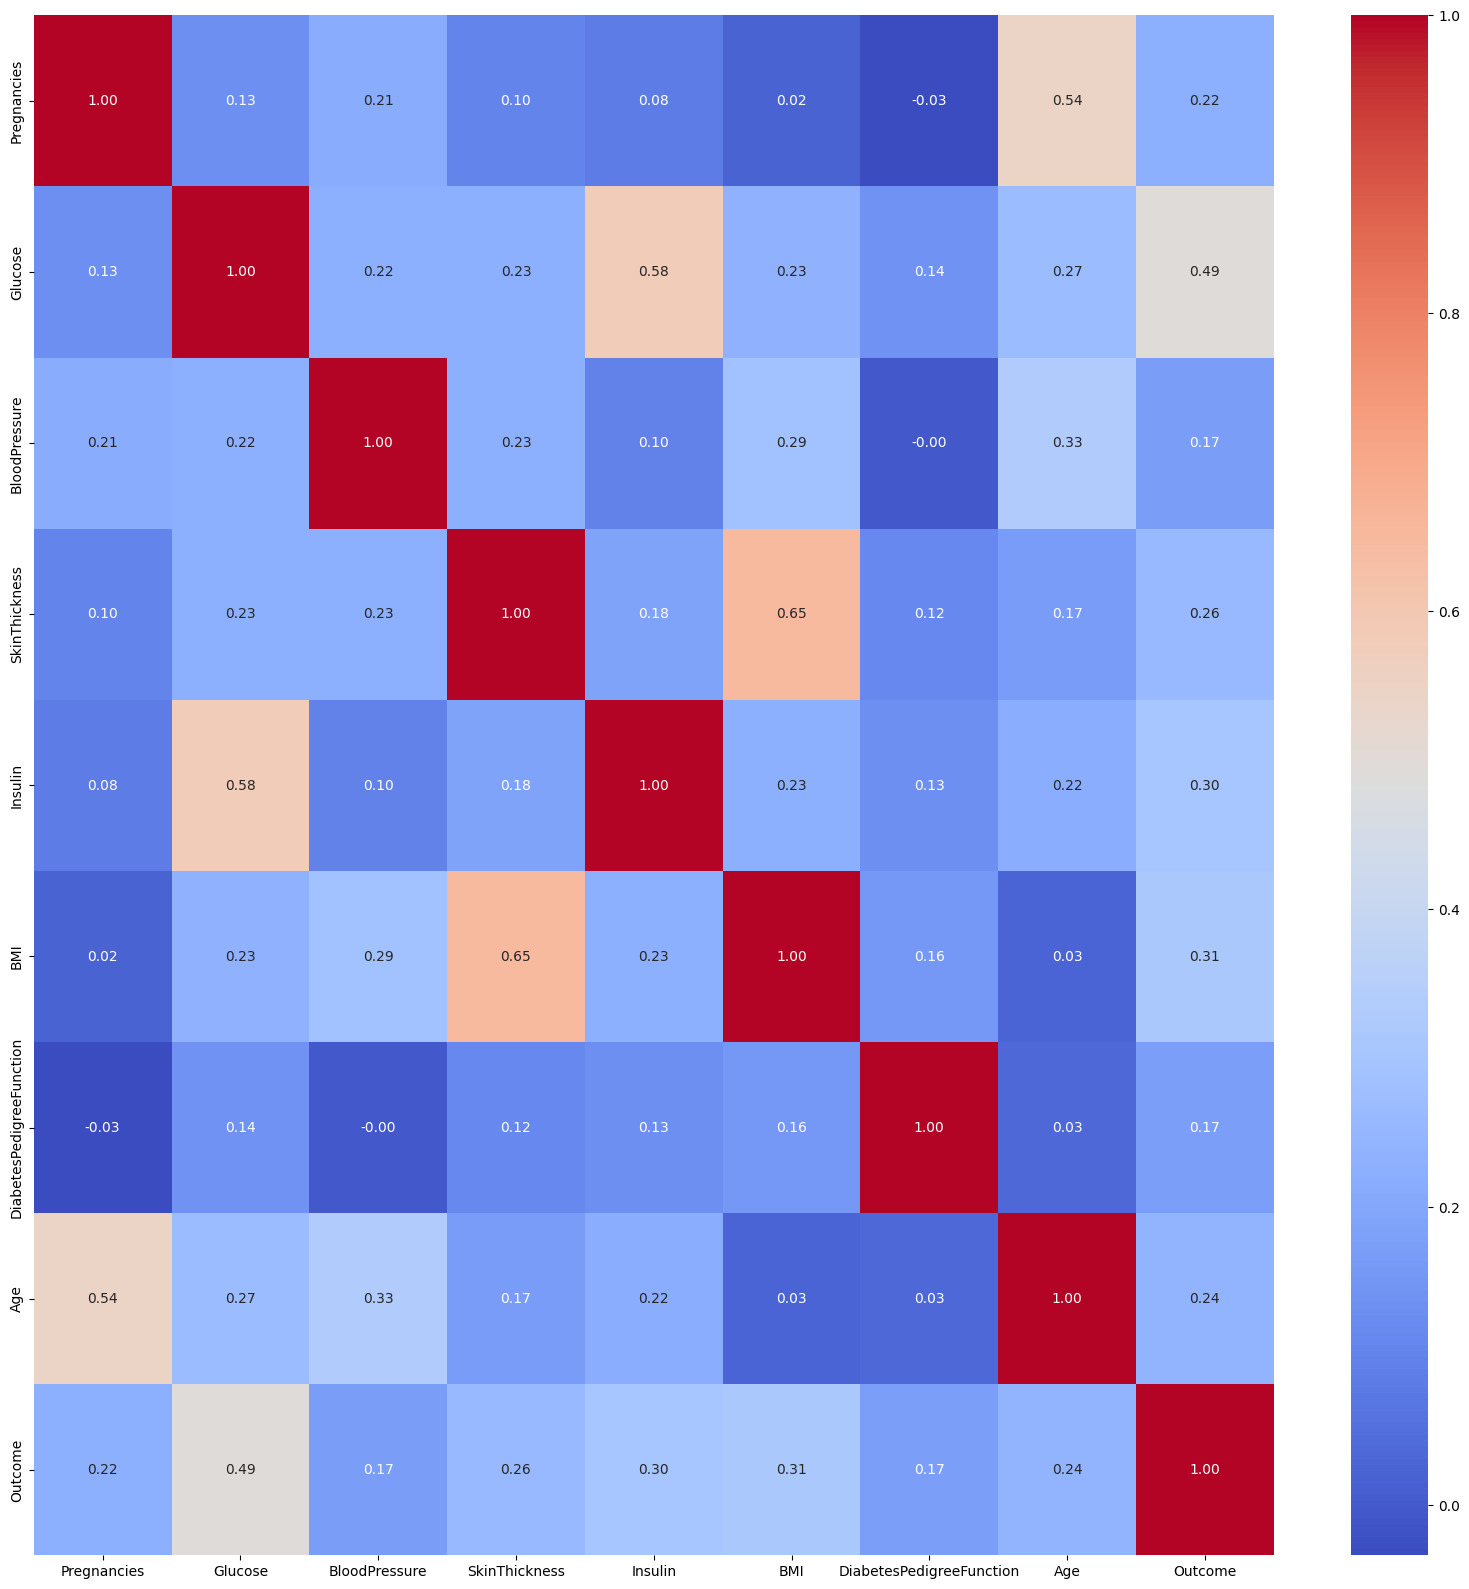

In [ ]:
#plotted the heatmap to find out how closely the attributes were related to each and the target variable which is 'Outcome' in this case
correlation_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})


In [ ]:
#checked for duplicates
df.duplicated().sum()

0

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

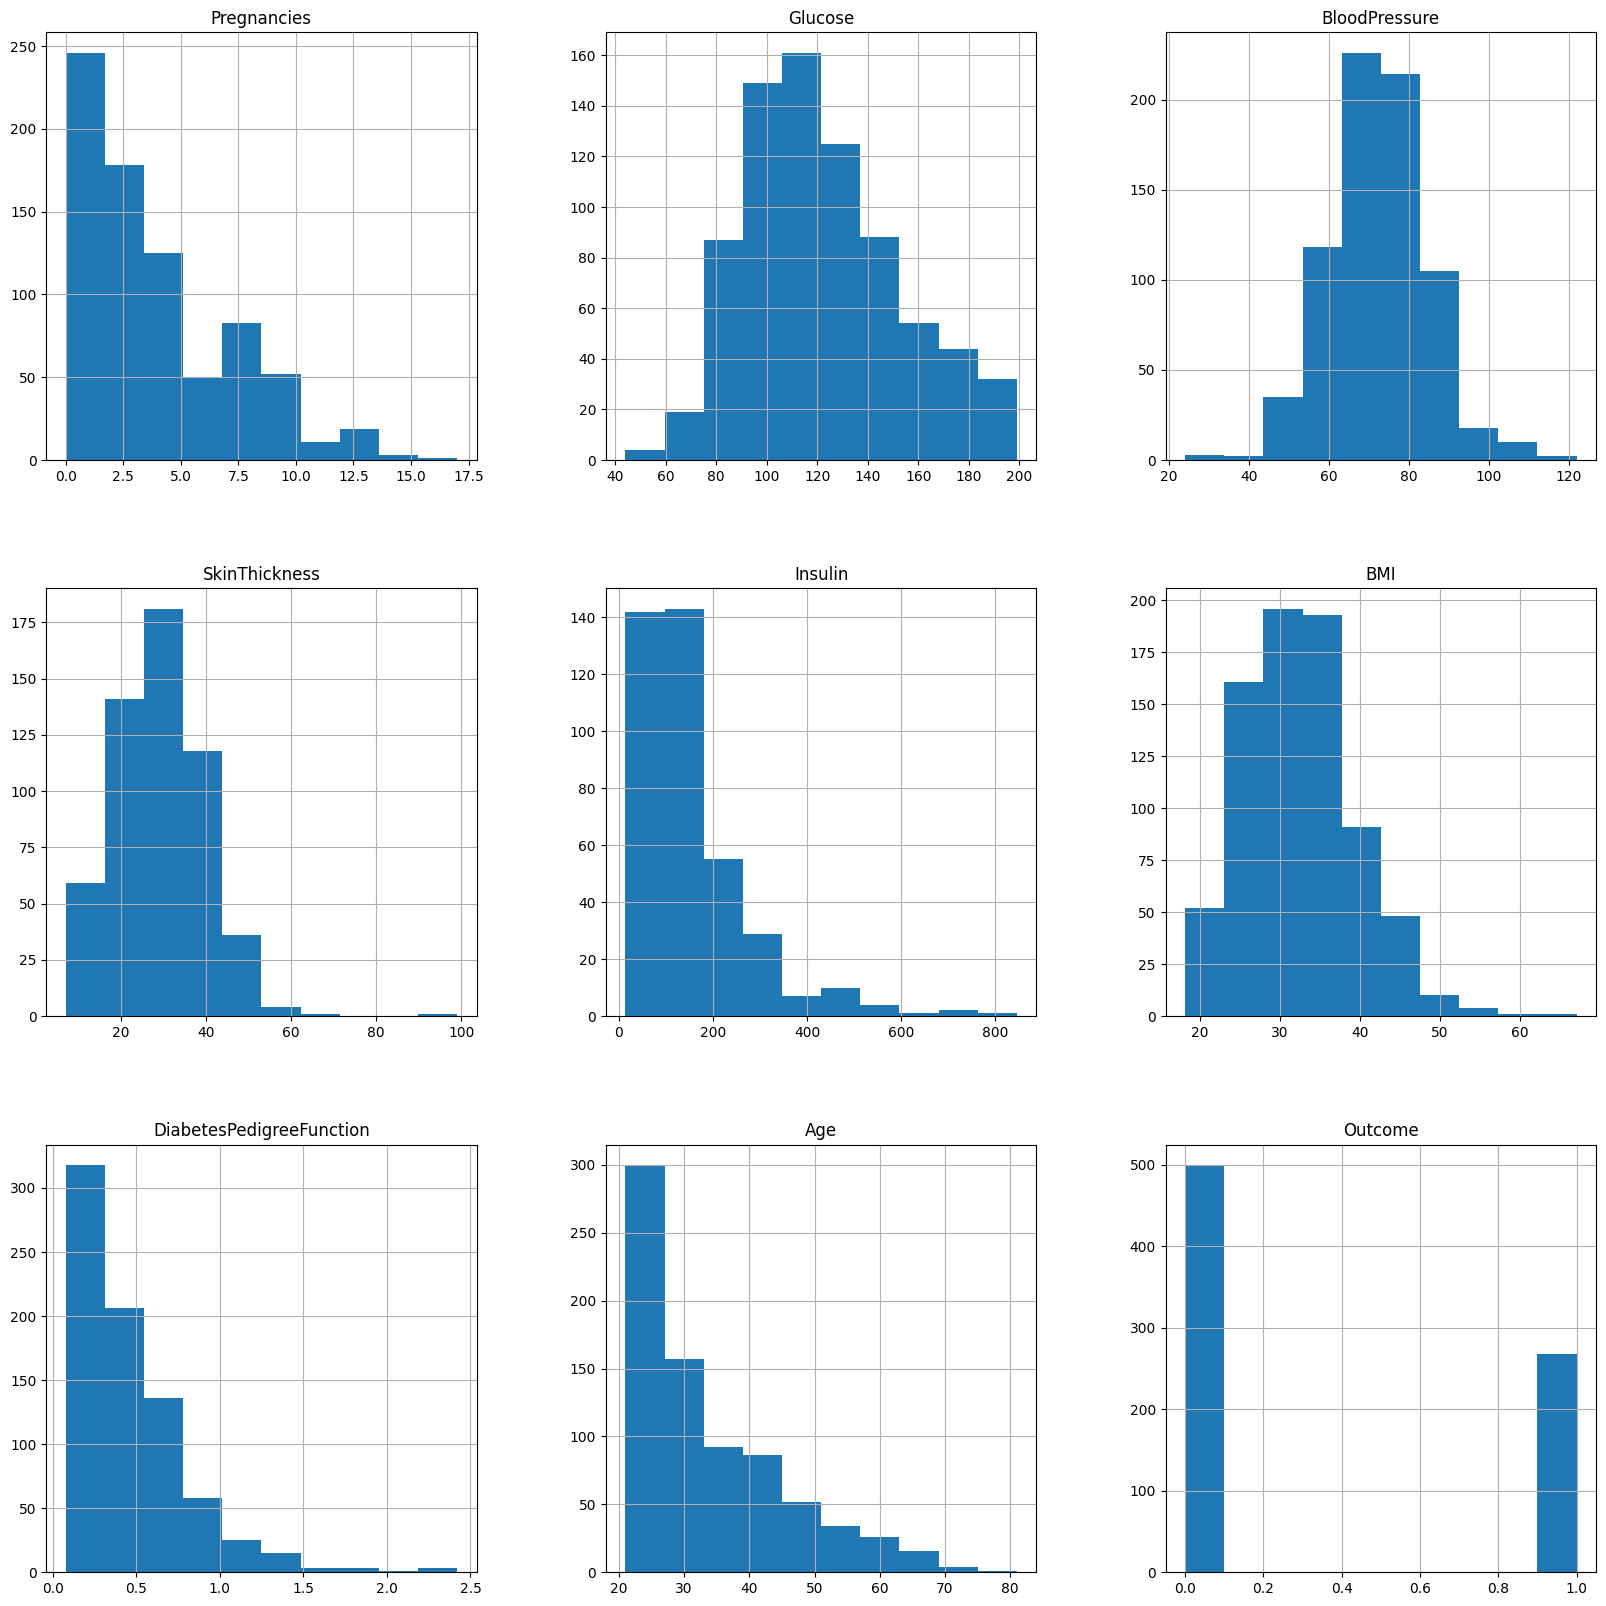

In [ ]:
#plotted histograms fro each attribute to see the distribution of data and then performed the imputation for nan values
df.hist(figsize=(20,20))

In [ ]:
df_copy=df.copy(deep=True)

In [ ]:
#used knn imputer for imputing the nan values since it estimates the missing values using by considering similarity between instances
knn_imputer = KNNImputer(n_neighbors=5)

# Columns with missing values
columns_for_knn_imputation = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI' ]

# Imputde missing values using KNN imputer
df_copy[columns_for_knn_imputation] = knn_imputer.fit_transform(df_copy[columns_for_knn_imputation])

<Axes: >

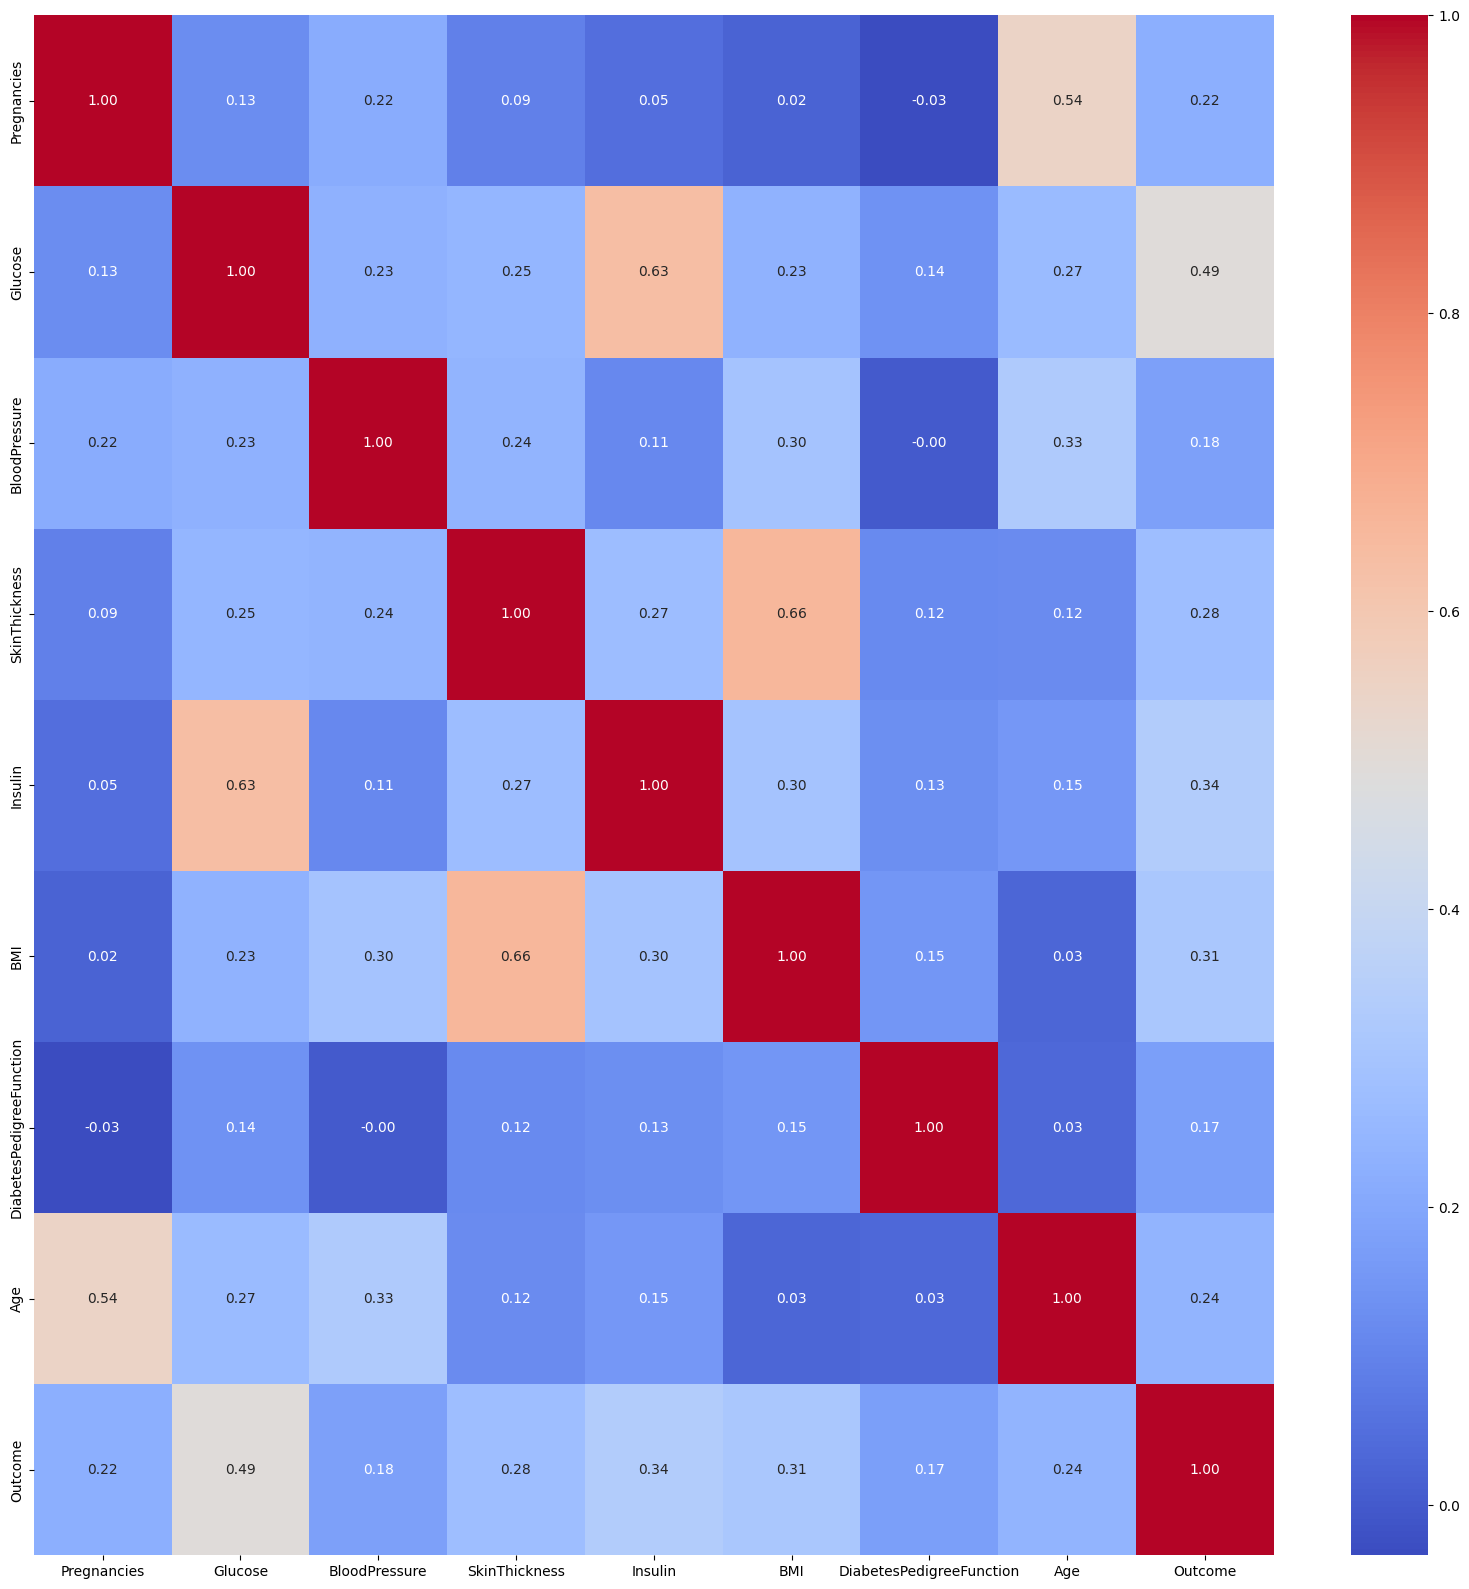

In [ ]:
#plotted the heatmap after imputing missing values
correlation_matrix = df_copy.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})

In [ ]:
#checked for nan values
df_copy.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Initialized StandardScaler
scaler = StandardScaler()
#initialized MinMax Scaler
scaler1= MinMaxScaler()
#takes every column except the last one since it already scaled
X=df_copy.columns[:-1]
#creating another copy for minmax
df_copy1=df_copy.copy(deep=True)
# Fit MinMaxScaler to data to transform it
m_scaler=scaler1.fit_transform(df_copy1[X])
# Fit StandardScaler to data to transform it
scaled_data = scaler.fit_transform(df_copy[X])
#scaled data using Standard Scaler
scaled_df = pd.DataFrame(scaled_data, columns=X)
#scaled daat using min max scaler
scaled_dfM=pd.DataFrame(m_scaler,columns=X)

In [ ]:
#added the last last column to the scaled data for training and testing purposes
scaled_df['Outcome'] = df_copy['Outcome']

In [ ]:
#wanted to see the data after it was scaled
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.862288,-0.028635,0.644452,0.595987,0.166726,0.468492,1.425995,1
1,-0.844885,-1.207101,-0.520992,0.011888,-0.785343,-0.850799,-0.365061,-0.190672,0
2,1.233880,2.011949,-0.685111,0.054059,2.365307,-1.330490,0.604397,-0.105584,1
3,-0.844885,-1.075711,-0.520992,-0.620676,-0.572049,-0.632758,-0.920763,-1.041549,0
4,-1.141852,0.500966,-2.654536,0.644452,0.179556,1.547653,5.484909,-0.020496,1


In [ ]:
# added the last column to scaled data by minmax scaler
scaled_dfM['Outcome'] = df_copy1['Outcome']
#wanted to see the data after it was scaled
scaled_dfM.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.234375,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.070913,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.243478,0.443750,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1


**Training and Testing Data which used Standard scaler technique**

In [ ]:
# added the last column which is target variable to the scaled df and used train test splitter to split into training and testing data
X,y = scaled_df.iloc[:, :-1] , scaled_df['Outcome']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=59)

In [ ]:

k_values = list(range(1, 51))  # Example range, adjust as needed

# Initialize lists to store accuracies
cross_validation_scores_mean = []
test_data_accuracies = []

# Iterate over each k value
for k in k_values:
    # Initialize KNN classifier with current k value
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

    # Perform cross-validation
    scores = cross_val_score(knn, x_train, y_train, cv=20)

    # Compute mean cross-validation score
    cross_validation_scores_mean.append(np.mean(scores))

    # Fit the model on the training data
    knn.fit(x_train, y_train)

    # Predict on the test data
    y_pred = knn.predict(x_test)

    # Calculate accuracy on the test set
    test_accuracy = accuracy_score(y_test, y_pred)
    test_data_accuracies.append(test_accuracy)




In [ ]:
# Find the value of k with highest cross-validation score
best_k_index = np.argmax(cross_validation_scores_mean)
best_k = k_values[best_k_index]
best_cv_score = cross_validation_scores_mean[best_k_index]

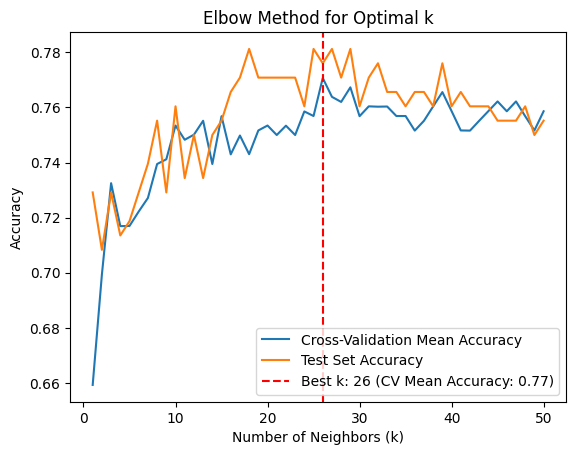

In [ ]:
# Plot the elbow curve
import matplotlib.pyplot as plt
plt.plot(k_values, cross_validation_scores_mean, label='Cross-Validation Mean Accuracy')
plt.plot(k_values, test_data_accuracies, label='Test Set Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Elbow Method for Optimal k')
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k: {best_k} (CV Mean Accuracy: {best_cv_score:.2f})')
plt.legend()
plt.show()

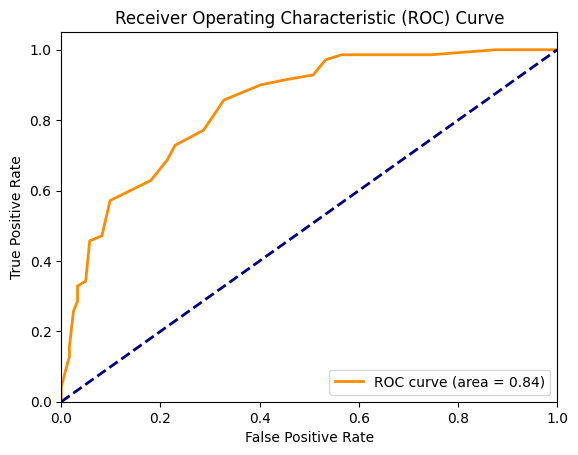

In [ ]:
best_k = 29  # Used the best k value obtained from the elbow method
knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')

# Fit the model on the training data
knn.fit(x_train, y_train)

# Get predicted probabilities for the positive class
y_score = knn.predict_proba(x_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Training and Testing Data which used MinMax scaler technique**

In [ ]:
# added the target variable column to the scaled data using min max scaler
X1,y1 = scaled_dfM.iloc[:, :-1] , scaled_dfM['Outcome']
# used the train test splitter to split into train(75%) and test data(25%) as mentioned in the assignment
x_train1,x_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.25,random_state=42)

In [ ]:
#tested for different values of k for scaled data using minmax scaler
k_values = list(range(1, 51))  # range

# Initialized lists to store accuracies and error rates
cross_validation_scores_mean = []
test_data_accuracies = []
error_rates = []
# Iterate over each k value
for k in k_values:
    # Initialize KNN classifier with current k value
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

    # Perform cross-validation
    scores = cross_val_score(knn, x_train, y_train, cv=20)

    # Compute mean cross-validation score
    cross_validation_scores_mean.append(np.mean(scores))

    # Fit the model on the training data
    knn.fit(x_train1, y_train1)

    # Predict on the test data
    y_pred1 = knn.predict(x_test1)

    # Calculate accuracy on the test set
    test_accuracy = accuracy_score(y_test1, y_pred1)
    test_data_accuracies.append(test_accuracy)

    #calculating error rates
    error_rate = 1 - test_accuracy
    error_rates.append(error_rate)


In [ ]:
# Find the value of k with highest cross-validation score
best_k_index = np.argmax(cross_validation_scores_mean)
best_k = k_values[best_k_index]
best_cv_score = cross_validation_scores_mean[best_k_index]

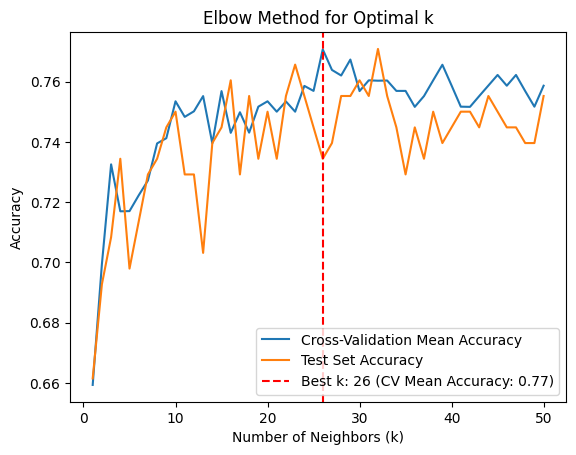

In [ ]:
# Plot the elbow curve for finding optimal value of k
import matplotlib.pyplot as plt
plt.plot(k_values, cross_validation_scores_mean, label='Cross-Validation Mean Accuracy')
plt.plot(k_values, test_data_accuracies, label='Test Set Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Elbow Method for Optimal k')
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k: {best_k} (CV Mean Accuracy: {best_cv_score:.2f})')
plt.legend()
plt.show()


In [ ]:
#the best value of k obtained is 26 but since it is even we are considering the next best value
best_k = 29  # Use the best k value obtained from the elbow method

knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')

# Fit the model on the training data
knn.fit(x_train1, y_train1)

# Get predicted probabilities for the positive class
y_score1 = knn.predict_proba(x_test1)[:, 1]

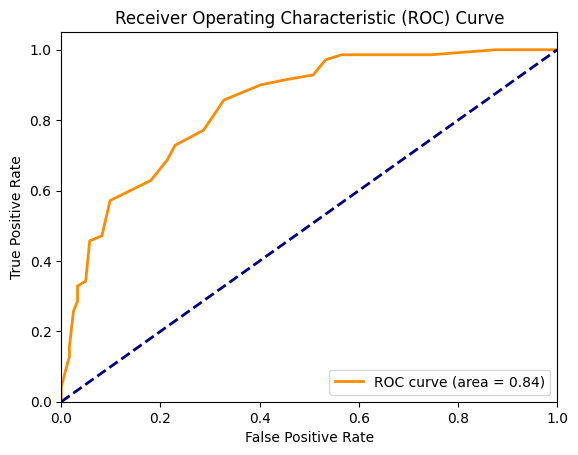

In [ ]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Error rate plot against k values**

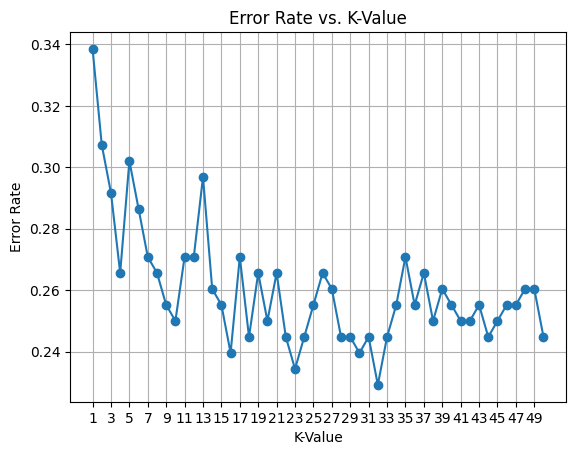

In [ ]:
# plotted the error rate vs k graph
error_rates=[]
for i in test_data_accuracies:
  error_rates.append(1-i)
plt.plot(k_values, error_rates, marker='o')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. K-Value')
plt.xticks(k_values[::2])
plt.grid(True)
plt.show()

In [ ]:

print("\nClassification Report when k is 29:")
print(classification_report(y_test, y_pred))


Classification Report when k is 29:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       122
           1       0.76      0.49      0.59        70

    accuracy                           0.76       192
   macro avg       0.76      0.70      0.71       192
weighted avg       0.76      0.76      0.74       192



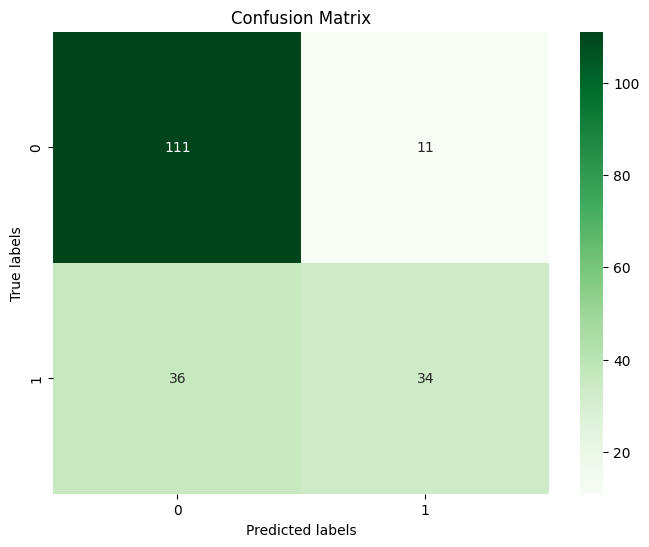

In [ ]:
#k is 29
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Classification report and confusion matrix when K= 10**

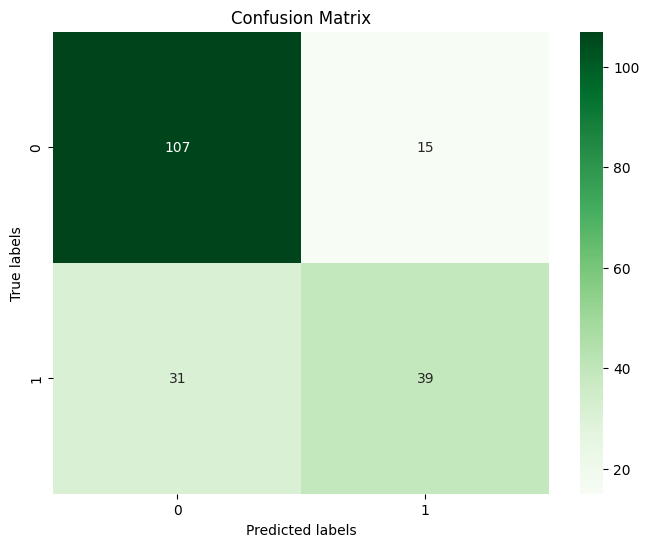

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

    # Perform cross-validation
scores = cross_val_score(knn, x_train, y_train, cv=20)

    # Compute mean cross-validation score
cross_validation_scores_mean.append(np.mean(scores))

    # Fit the model on the training data
knn.fit(x_train, y_train)

    # Predict on the test data
y_pred = knn.predict(x_test)

    # Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

#k is 10
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("\nClassification Report when k is 10:")
print(classification_report(y_test, y_pred))


Classification Report when k is 10:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       122
           1       0.72      0.56      0.63        70

    accuracy                           0.76       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.76      0.76      0.75       192



**Classification report and confusion matrix when K= 50**

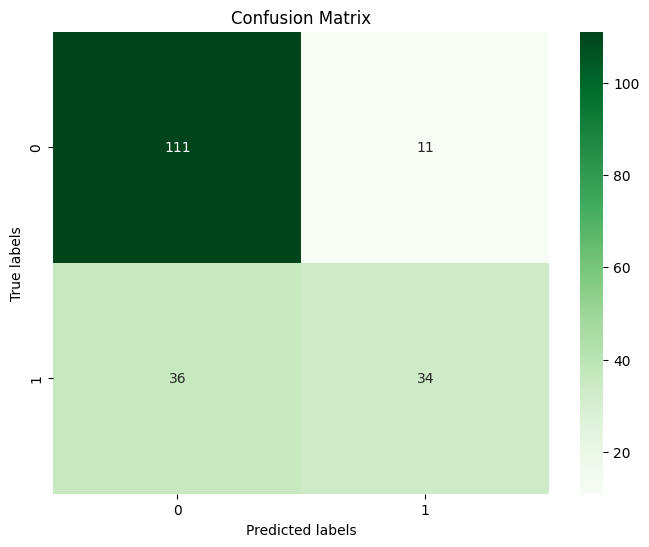


Classification Report when k is 50:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       122
           1       0.76      0.49      0.59        70

    accuracy                           0.76       192
   macro avg       0.76      0.70      0.71       192
weighted avg       0.76      0.76      0.74       192



In [ ]:
knn = KNeighborsClassifier(n_neighbors=50, metric='euclidean')

    # Perform cross-validation
scores = cross_val_score(knn, x_train, y_train, cv=20)

    # Compute mean cross-validation score
cross_validation_scores_mean.append(np.mean(scores))

    # Fit the model on the training data
knn.fit(x_train, y_train)

    # Predict on the test data
y_pred = knn.predict(x_test)

    # Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

#k is 50
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print("\nClassification Report when k is 50:")
print(classification_report(y_test, y_pred))

In [ ]:
most_significant_attributes = ['Glucose', 'Insulin', 'BMI']

# Create a 2D projection with the target variable and the three most significant attributes
plt.figure(figsize=(12, 6))
for attribute in most_significant_attributes:
    plt.scatter(scaled_dfM[attribute], scaled_dfM['Outcome'], label=attribute)

plt.title('2D Projection of Target Variable with Three Most Significant Attributes')
plt.xlabel('Attributes')
plt.ylabel('Outcome')
plt.legend()
plt.grid(True)
plt.show()


***REPORT***
a. Nearest neighbors Method
1. The nearest neighbors method works in the following way:
2. There is no specific training phase, it takes the test data and for each record it computes the distances based on similarity measures with each of the training records.
3. It can use different distance metrics which depend on the type of attributes which can be categorical or numerical.
4. Some of the common distance metrics used are hamming distance, euclidean distance, minkowski distance and manhattan distance.
5. After computing the distances with each record of training data for every test record, the distances are sorted and the nearest distance values' labels of training data are considered for deciding the class of the test record.
6. The value of k is chosen according to the various factors such as size of dataset, features in the dataset, how balanced the dataset is. The K nearest neighbors' class labels considered for finally assigning each of the test records a label. When these k nearest neighbors have different classes the class which has majority or most ferquently repeated class is chosen as the final class label for the test record.
7. This process is repeated iteratively for each test record untill all of them are assigned a class label.
Scaling is important in Knn as it knn works on similarity of instances to classify the test records. If the data is not properly scaled the distances calculated will vary, it is important to normalize the data so that teh distances within each column don't differ from each other by too much which won't affect the overall classification. Since KNN primarily depends on distance measure.

b. Our criteria for selecting the three attributes was the correlation matrix which shows how closely teh attributes are related. The three attributes we chose are Glucose, BMI and Insulin and they have values of 0.49, 0.34 and 0.28 after we imputed the data for missing values. The other three attributes we can choose are Skin Thickness, Age and Pregnancies since they are next three most closely related attributes.

b. Observations for Visualizations of the target variable with the 3 chosen attributes:
1. There is a positive correlation between higher levels of glucose higher levels of insulin and higher BMI with the outcome.
2. Glucose has the strongest correlation with outcome compared to BMI and Insulin since glucose increases along the x axis and the the outcome also becomes 1 with the increase in glucose levels.
3. BMI also shows an upward trend with respect to the target variable Outcome so it is also positively correlated with it, but not as strongly as Glucose.
4. Lastly Insulin also shows a positive correlation with Outcome.We can infer that variability in these three attributes which also show variability in the Outcome.

c. Pearson's Correlation Coefficient
This is a statistical measure which shows the how strongly the attributes of a dataset are related and teh direction of linear relationship between two continuous variables.
It is used to find out which columns have greater impact on the target variable and in general which columns have more significance. It is also used to decide which columns to drop or keep when there are too many features.
It is represented by 'r' which when =1 means perfect positive linear correlation, =-1 means perfect negative correlation and = 0 means no linear correlation.

Observations from heatmap before cleaning
From the heatmap we can observe that glucos and BMI had the highest positive correlations with Outcome. Diabetes Pedigree Function has a moderate positive correlation of
0.17.
There is also strong positive correlation between Glucose-BMI, Glucose-Insulin and BMI-Age.
Blood Pressure and SkinThickness have relatively less correlation with the Outcome variable.

Observations of Heatmap after cleaning
Glucose and BMI remained strongly correlated with Outcome with levels 0.49 and 0.31 respectively.
The correlation ebtween Glucose and Insulin increased slightly from 0.58 to 0.63.
After the imputation the correlations of skin thickness- outcome, insulin- outcome increased from 0.18 t0 0.28 and 0.23 to 0.34 respectively.
Preganancies correlation did not change so significantly.

d. The overall correlation patterns didnt change much, i.e, stringly correlated attributes were still strongly correlated and weakly correlated also remained the same.
However the individual correlation coefficients of the attributes for some changed significantly such as for Insulin and Skin Thickness. This also indicates that their importance increased with respect to the dependent variable 'outcome'.
Blood Pressure and Age had low correlation coefficients before and after cleaning the data and they were not so strongly related to the OutCome.
Even the correlation coefficient for Pregnancies didn't change much.

We also compared the two scaling techniques which are standard scaler and minmax scaler to see which of them work better but there wasnt much difference between the two, so we worked with the scaled data from standard scaler.

We chose a broad range of k values ranging from 1 to 51 since the dataset is slighlty imablanced and there were 8 features so more dimensions used for measuring distances.
We chose KNN imputer because it estimates missing values by considering the similarity between instances. It also preserves the local stricture of the data which is useful in KNN.
It provides more consistency with data and patterns in data that is why we chose KNN imputer for missing values.
We also plotted the Roc curve and got a high value of 0.84 which means the true positive rate is relatively high when compared to the false positive rate.
The the best value of k obtained is 26 but since it is even we are considering the next best value which is 29 and it is odd.

Contributions:
Team Members
2.  Bindu Nagineni-  1002175940

Both of us did the KNN algorithm together and contributed equally. We searched for different scaling techniques and different imputation methods to decide the best one for this dataset. After analyzing the pros and cons we decided on the scaling technique and imputation method. We were discussing the code and writing it together.












